In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf


Design a traditional X-S control chart in order to have an average number of samples before a 
false alarm equal to 200 for both the charts with n=5 observation. 

In [2]:
mu=4
std=0.2
var=0.2**2
ARL0=200
alpha=1/200
K=stats.norm.ppf(1-alpha/2)
n=5


In [3]:

c4=qda.constants.getc4(n)

data_XS = pd.DataFrame(columns=['Xbar_CL', 'Xbar_UCL', 'Xbar_LCL','S_CL','S_UCL','S_LCL'])

# Compute the CL, UCL and LCL for Xbar and S
Xbar_CL = mu
Xbar_UCL = mu + K*std/np.sqrt(n)
Xbar_LCL = mu - K*std/np.sqrt(n)

S_CL = c4 * std  # Expected value of s (sample standard deviation)
S_UCL = c4 * std + K * np.sqrt(1 - c4**2) * std
S_LCL = c4 * std - K * np.sqrt(1 - c4**2) * std
if S_LCL < 0:
    S_LCL=0

for i in range(5):
    data_XS.loc[i] = [Xbar_CL, Xbar_UCL, Xbar_LCL, S_CL, S_UCL, S_LCL]

  
2) The following table shows the sample mean and standard deviation values obtained by printing 
five samples, each of size n=5 (measures are in mm). Is the process in-control?

In [4]:
sample_mean=np.array([4.0738, 3.9406, 4.0430, 3.9968, 3.8290])

sample_std=np.array([0.1638, 0.2148, 0.1711, 0.1312, 0.1555])

data_XS['sample_mean']=sample_mean
data_XS['sample_std']=sample_std


In [5]:
data_XS['Xbar_TEST1'] = np.where((data_XS['sample_mean'] > data_XS['Xbar_UCL']) | 
                (data_XS['sample_mean'] < data_XS['Xbar_LCL']), data_XS['sample_mean'], np.nan)
data_XS['S_TEST1'] = np.where((data_XS['sample_std'] > data_XS['S_UCL']) | 
                (data_XS['sample_std'] < data_XS['S_LCL']), data_XS['sample_std'], np.nan)

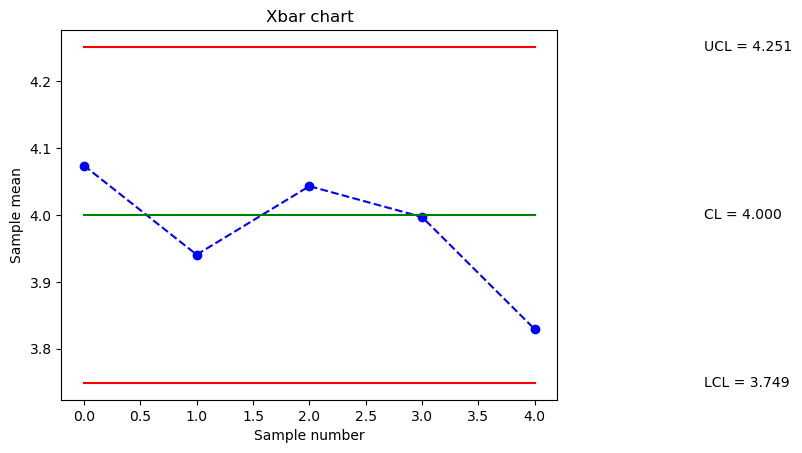

In [6]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XS['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['Xbar_UCL'], color='r')
plt.plot(data_XS['Xbar_CL'], color='g')
plt.plot(data_XS['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

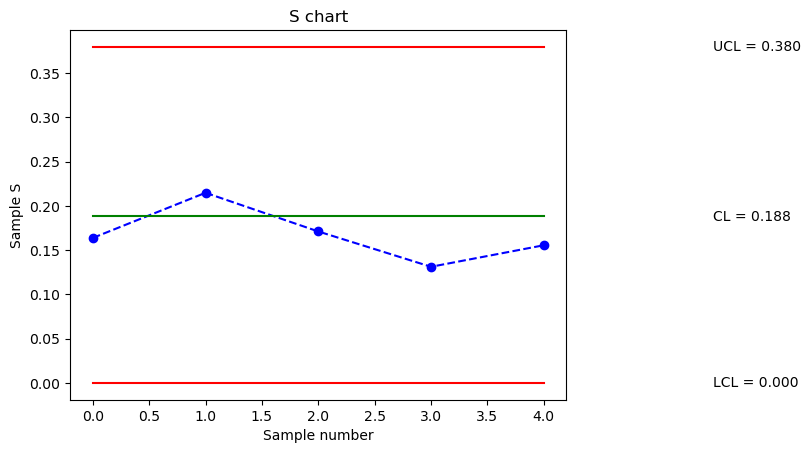

In [7]:
# Plot the S chart
plt.title('S chart')
plt.plot(data_XS['sample_std'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['S_UCL'], color='r')
plt.plot(data_XS['S_CL'], color='g')
plt.plot(data_XS['S_LCL'], color='r')
plt.ylabel('Sample S')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['S_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['S_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['S_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['S_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['S_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


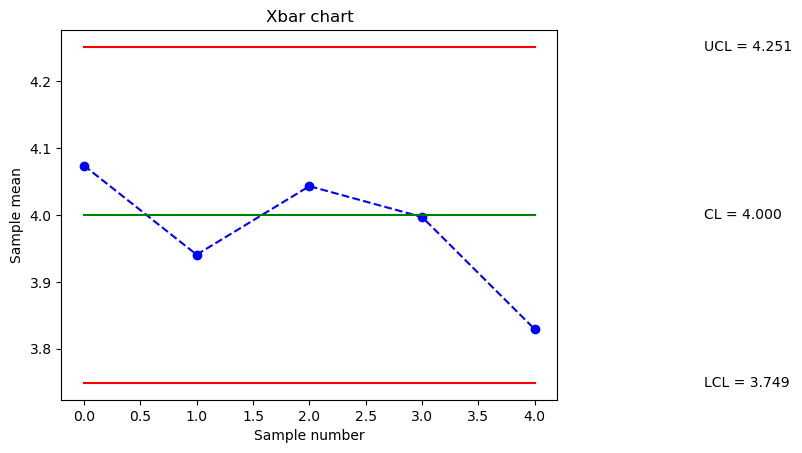

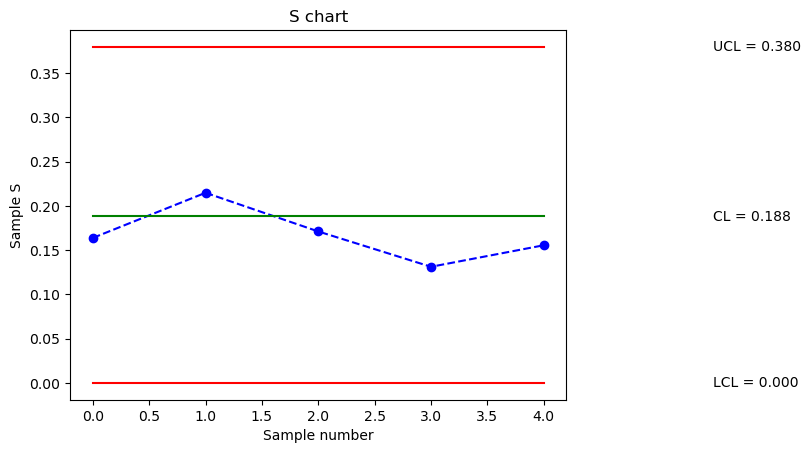

In [8]:
data_XS2=mf.xbars_mu_given(mu,std,n,alpha,sample_mean,sample_std)

3) The company thinks that the S charts yields an ARL0 different from the nominal one. Compute the 
real value of ARL0 for this chart and the percentage error between the nominal ARL0 and the real 
one. 

In [9]:
#we know that S is NOT normally distributed so the alpha is actually different!
S_LCL5=S_LCL
S_UCL5=S_UCL
inf=(S_LCL**2)*(n-1)/var #0 perchè S_LCL=0
sup=(S_UCL**2)*(n-1)/var

sign_test_5=stats.chi2.cdf(sup,n-1)-stats.chi2.cdf(inf,n-1) #1-alpha_test
alpha_test_5=1-sign_test_5
true_ARL0_5=1/alpha_test_5

error_arl_perc_5=((true_ARL0_5-ARL0)/ARL0)*100
print(true_ARL0_5)
print(true_ARL0_5-ARL0)
print(error_arl_perc_5)

#l'ARL0 vero è più alto, ossia si aspetta di più per un false allarm! di contro il test è meno potente

163.80148628539857
-36.19851371460143
-18.099256857300716


In [9]:
1-stats.chi2.cdf(sup,n-1)

0.006104950710017709

4) How does the percentage error computed in c) change by using different sample sizes n (show the 
values for n=2, 5, 10, 20 and 50)? 

In [10]:
n=np.array([2,5,10,20,50])

c4=np.array([qda.constants.getc4(2),qda.constants.getc4(5),qda.constants.getc4(10),qda.constants.getc4(20),qda.constants.getc4(50)])

S_UCL = c4 * std + K * np.sqrt(1 - c4**2) * std
S_LCL = c4 * std - K * np.sqrt(1 - c4**2) * std
S_LCL[S_LCL < 0] = 0

inf=(S_LCL**2)*(n-1)/var #0 perchè S_LCL=0
sup=(S_UCL**2)*(n-1)/var

sign_test=stats.chi2.cdf(sup,n-1)-stats.chi2.cdf(inf,n-1) #1-alpha_test
alpha_test=1-sign_test
true_ARL0=1/alpha_test
error_arl=true_ARL0-ARL0
error_arl_perc=((true_ARL0-ARL0)/ARL0)*100

print("alpha vero è {}" .format(alpha_test))
print("ARL0 vero è {}" .format(true_ARL0))
print("errore percentuale è {}" .format(error_arl_perc))
print("errore assoluto è {}" .format(error_arl))


alpha vero è [0.01277455 0.00610495 0.00512005 0.00500518 0.00499378]
ARL0 vero è [ 78.28065473 163.80148629 195.31063065 199.7930412  200.24895155]
errore percentuale è [-60.85967264 -18.09925686  -2.34468468  -0.1034794    0.12447578]
errore assoluto è [-121.71934527  -36.19851371   -4.68936935   -0.2069588     0.24895155]


Plot the OC curve of beta against the entity of mean deviation expressed in standard deviation 
units. Remind that the error beta for a X-S control chart is the probability of having no alarm from 
both the charts under out-of-control conditions. Show the curve (qualitative plot), its formulation and 
the values for delta = 1, 2 and 3. 

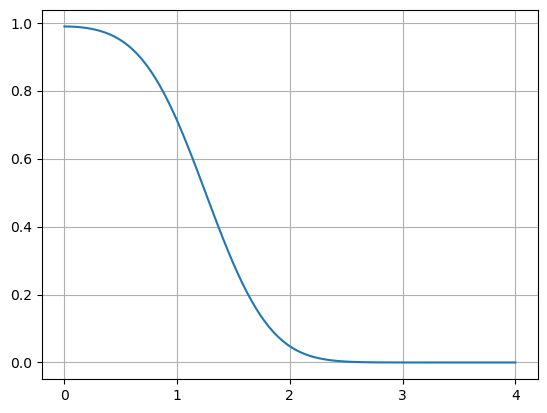

[7.11617281e-01 4.76534762e-02 4.75722043e-05]


In [11]:
delta_piccolo=np.linspace(0,4,100) #mu1=mu*delta_piccolo
beta_xbar=stats.norm.cdf(K-delta_piccolo*np.sqrt(5))-stats.norm.cdf(-K-delta_piccolo*np.sqrt(5))

beta_S=1-alpha_test_5 #praticamente questo è il beta0, è la significatività del test
#rimane una costante perchè non è specificato nessuno shift della stdev e beta_S non dipende
#in nessunissimo modo dallo shift della media (al contrario di beta_Xbar che sarebbe affetto anche
#da uno shift della varianza)

beta=beta_S*beta_xbar
plt.plot(delta_piccolo,beta)
plt.xticks([0,1,2,3,4])
plt.grid()
plt.show()

delta_piccolo=np.array([1,2,3])
beta_xbar=stats.norm.cdf(K-delta_piccolo*np.sqrt(5))-stats.norm.cdf(-K-delta_piccolo*np.sqrt(5))
beta_S=1-alpha_test_5
beta=beta_S*beta_xbar

print(beta)

Refer to the OC curve computed at point 5) of the previous exercise. The engineers observed that the 
printed specimens exhibit a proportional relationship between the mean and standard deviation of the 
diameter, such that 𝜇=𝑐𝜎, and the same factor 𝑐 applies also in case of large deviations from the 
nominal size. 
How does the OC curve changes if we take into account this information? 
Show the curve (qualitative plot), its formulation and the values for delta = 1, 2 and 3

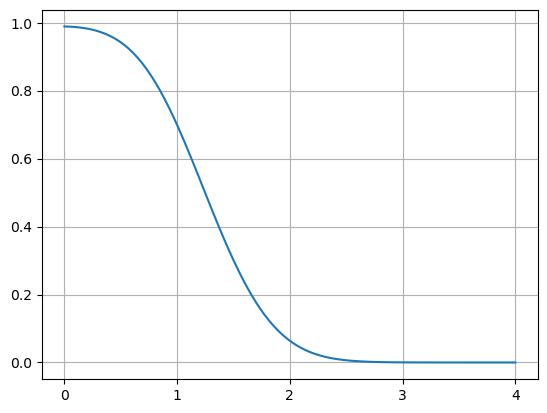

i beta xbar [7.06701730e-01 6.50472602e-02 3.46514871e-04]
i beta S [0.98904692 0.98193646 0.97220997]
i beta complessivi [6.98961171e-01 6.38722766e-02 3.36885212e-04]


In [14]:
#in generale si può affermare che mu=c*sigma dal testo
#quindi:
c=mu/std #20
n=5
delta_piccolo=np.linspace(0,4,100) 

#ci dicono che il medesimo fattore c'è anche quando avvengono gli shift della media!
#in pratica a sto giro il beta varia in qualche modo con delta_piccolo anche per l'S chart
#facendo due conti
std1= mu/c + (delta_piccolo/c)*std #ci serve per il beta_S

#facendo due calcoli:
beta_S=stats.chi2.cdf(S_UCL5**2*(n-1)/std1**2,n-1)-stats.chi2.cdf(S_LCL5**2*(n-1)/std1**2,n-1)

#sappiamo che il beta x bar è influenzato dal cambio della sigma quindi pure qui abbiamo una variazione
#facendo due calcoli:
beta_xbar=stats.norm.cdf((K*std-delta_piccolo*std*np.sqrt(n))/std1)-stats.norm.cdf((-K*std-delta_piccolo*std*np.sqrt(n))/std1)
beta=beta_S*beta_xbar
plt.plot(delta_piccolo,beta)
plt.xticks([0,1,2,3,4])
plt.grid()
plt.show()

delta_piccolo=np.array([1,2,3])
std1= mu/c + (delta_piccolo/c)*std #ci serve per il beta_S
beta_xbar=stats.norm.cdf((K*std-delta_piccolo*std*np.sqrt(n))/std1)-stats.norm.cdf((-K*std-delta_piccolo*std*np.sqrt(n))/std1)
beta_S=stats.chi2.cdf(S_UCL5**2*(n-1)/std1**2,n-1)-stats.chi2.cdf(S_LCL5**2*(n-1)/std1**2,n-1)
beta=beta_S*beta_xbar

print("i beta xbar {}" .format(beta_xbar))
print("i beta S {}" .format(beta_S))
print("i beta complessivi {}" .format(beta))

#piccolissime differenze